# Visualiser des données avec Matplotlib

Matplotlib est une librairie Python permettant de réaliser des visualisations de données. 

Pandas dispose d'une intégration facile permettant de réaliser des graphes de différentes sortes à partir d'un DataFrame. 

Dans cette partie, vous apprendrez ainsi à : 

- Intégrer des visualisations au sein d'un document iPython. 
- Réaliser des graphiques (lignes, barchart, scatterplots)
- Ajouter des titres, ajuster les axes et les couleurs

## Paramètres 

Nous importons les librairies Pandas et Numpy :

In [ ]:
import pandas as pd
import numpy as np

Nous pouvons également spécifier différents paramètres d'affichages, assez utiles : 

- Le paramètre **inline** permet d'intégrer des graphes au sein d'un document iPython (et non sur une fenêtre extérieure)
- Le paramètre **style:default** permet d'avoir un rendu des graphes plus sympa :

In [ ]:
import matplotlib
%matplotlib inline

pd.options.display.mpl_style = 'default'

## Graphiques de ligne

Prenons la Série suivante, de 100 points générés aléatoirement : 

In [ ]:
p = pd.DataFrame(np.random.randn(100,1))

La méthode **plot** permet de réaliser facilement un graphique de ligne :

In [ ]:
p.plot()

Par défaut la méthode plot utilise en abscisse l'index de la Série ou du DataFrame. 

Nous pouvons appliquer ce type de visualisation au dataset **coffee** : 

In [ ]:
coffee = pd.read_csv("data/coffee_shop.csv", 
                     parse_dates = True, 
                     index_col=1)

Comme nous l'avons vu précédemment, nous parsons le dataset coffee, en utilisant la colonne 1 (de date) comme l'index : 

In [ ]:
coffee.head(3)

Ce dataset contient une ligne par mois, par localité et par ligne de produit. 

Si nous souhaitons afficher l'évolution des ventes par mois, nous pouvons tout d'abord grouper : 

In [ ]:
coffee_s = coffee['Sales'].groupby(coffee.index).sum()

Nous pouvons ensuite appeler la méthode **plot** comme vu précédemment :

In [ ]:
coffee_s.plot()

Par défaut, la fonction **plot** ajuste l'axe des ordonnés. Nous pouvons fixer les limites des axes avec les paramètres **xlim** et **ylim** : 

In [ ]:
coffee_s.plot(ylim=[0,40000],kind='area')

La méthode **plot** peut prendre également le paramètre **kind='area'** si vous souhaitez rendre une aire plutôt qu'une ligne

La fonction plot, fonctionne également avec plusieurs valeurs numériques. 

Si nous souhaitons afficher l'évolution des ventes et de la marge, nous pouvons écrire : 

In [ ]:
grouped_sm = coffee[['Sales','Margin']].groupby(coffee.index).sum()

grouped_sm.plot(ylim=[0,40000])

Nous pouvons également ajouter un titre, grâce au paramètre **title** : 

In [ ]:
grouped_sm.plot(title='Evolution des ventes et de la marge, Coffee Shop, 2012 - 2013')

## A vous : 

- Affichez l'évolution mensuelle de la marge et des dépenses
- Affichez l'évolution trimestrielle du profit 

## Graphiques en bâtons

Le paramètre **kind** de la méthode **plot** permet de choisir le type de visualisation à afficher. 

Si nous souhaitons afficher le nombre de ventes par marché, nous pouvons écrire : 

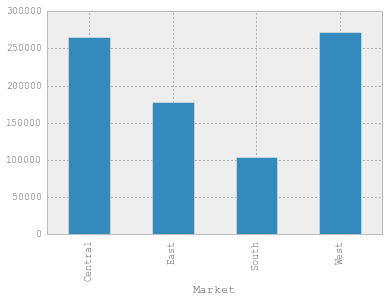

In [39]:
grouped_m = coffee['Sales'].groupby(coffee['Market']).sum()

grouped_m.plot(kind='bar')

Le paramètre **kind=barh** permet d'afficher des barres, à l'horizontal :

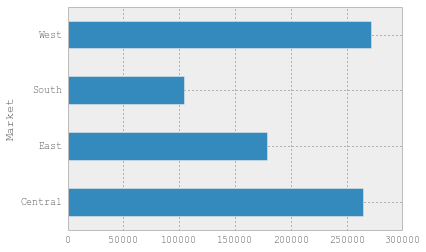

In [40]:
grouped_m.plot(kind='barh')

Une bonne pratique pour explorer rapidement un set de données, est d'utiliser la méthode **value_counts** avec un graphe en bâton. 

Si nous souhaitons par exemple dénombrer le nombre d'occurence de chacun des produits, nous pouvons écrire : 

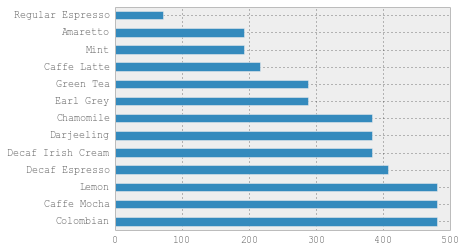

In [41]:
coffee['Product'].value_counts().plot(kind='barh')

Nous pouvons également afficher plusieurs dimensions sur un graphe en bâton. 

Prenons l'exemple des marchés, nous pouvons réaliser un grouping sur deux clés, et afficher la part des Major / Small markets au sein de chacun des Market (East, Central, West, South)

In [ ]:
coffee_mm = coffee['Sales'].groupby([coffee['Market'], coffee['Market Size']]).sum()

coffee_mm

Si nous appelons la méthode **plot** à partir de ce DataFrame, nous obtenons une ligne par combinaison d'Index : 

In [ ]:
coffee_mm.plot(kind='barh')

Nous pouvons faire **pivoter** ce graphe, grâce à la fonction **unstack** : 

In [ ]:
coffee_mm.unstack()

Ce qui en graphe donne : 

In [ ]:
coffee_mm.unstack().plot(kind='barh')

Nous pouvons enfin 'empiler' chacun de ces graphes, grâce au paramètre **stacked** : 

In [ ]:
coffee_mm.unstack().plot(kind='barh', stacked=True)

## A vous :

- Créez un graphe en bâton affichant la part des ventes, des Espresso ou des Coffee par type (Decaf ou Regular)

## Histogrammes

Les histogrammes permettent de représenter la répartition d'une variable continue. 

La variable est séparée en classe (ou bins) et nous représentons le nombre d'occurences de cette variable dans cette classe.

Pandas permet de réaliser un histogramme à partir d'une série, grâce à la méthode **hist** :

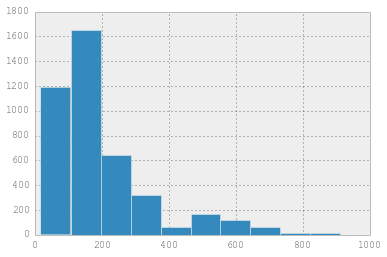

In [47]:
coffee['Sales'].hist()

Nous pouvons modifier le nombre de classes, grâce au paramètre **bins** : 

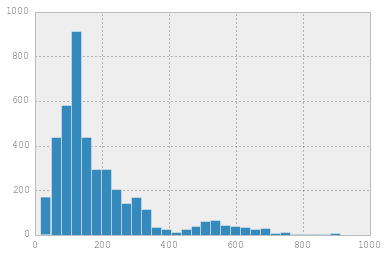

In [48]:
coffee['Sales'].hist(bins=30)

## Nuages de points

Les nuages de points sont particulièrement efficaces pour représenter la répartition de données selon deux axes. 

Les matrices de nuages de points permettent de représenter les mêmes points à travers plusieurs axes. 

Comme précédemment, nous pouvons facilement tracer un nuage de point, grâce au paramètre **scatter** de la méthode **plot** 

In [49]:
df = pd.DataFrame(np.random.rand(100,2))

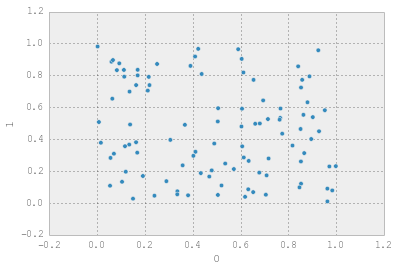

In [50]:
df.plot(kind='scatter',x=0,y=1)

A la différence des graphes précédents, un nuage de points nécessite que nous précisions l'abscisse et l'ordonnée, grâce aux paramètres **x** et **y**. 

Un troisième paramètre, **s** permet de fixer la taille des bulles. 

## A vous : 

- Faites un nuage de points des produits par moyenne de ventes et marge mensuelles  

La méthode **pd.scatter_matrix** permet de réaliser facilement une matrice de nuages de points à partir d'un dataset à plusieurs variables numériques.

Créons un dataframe à partir de coffee avec les colonnes = ['Budget Profit', 'Budget Margin', 'Margin', 'Total Expenses', 'Sales'] :

In [51]:
mv_df = coffee[['Budget Profit', 'Budget Margin', 'Margin', 'Total Expenses', 'Sales']].groupby(coffee['Product']).mean()

Nous pouvons afficher une matrice de nuage de points en appelant la méthode suivante : 

array([[<matplotlib.axes.AxesSubplot object at 0x10b118950>,
        <matplotlib.axes.AxesSubplot object at 0x10b4ce590>]], dtype=object)

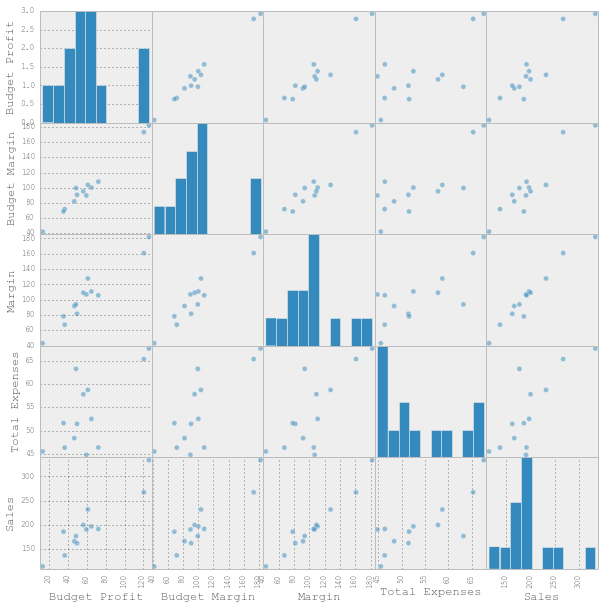

In [52]:
pd.scatter_matrix(mv_df, figsize=[10,10], s=100)